In [16]:
%pylab inline

import matplotlib as pyplot
import os
import pandas as pd
FEATUREDIR = "/storage/mgymrek/gtex/causality/features/"
SCORETYPE = ""

MINDIST = 2000
MINQ = 1
percentiles = [0, 50] + list(np.arange(60, 101, 10))

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.4/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pyplot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
def GetBootstrapCI(data, func):
    numiter = 1000
    vals = []
    for i in range(numiter):
        x = np.random.choice(data, size=data.shape[0], replace=True)
        vals.append(func(x))
    se = np.sqrt(np.var(vals))
    return np.mean(vals)-1.96*se, np.mean(vals)+1.96*se

In [18]:
# Plot TSS/TES
data = pd.read_csv(os.path.join(FEATUREDIR, "GTEx_merged_causality_tsstes%s.tab"%SCORETYPE), sep="\t")

bins = np.percentile(data[data["best.q"]<=MINQ]["best.score"], q = percentiles)
binlabels = []
tss = []
tss_low = []
tss_high = []
tes = []
tes_low = []
tes_high = []

for i in range(len(bins)-1):
    lb = bins[i]
    ub = bins[i+1]
    x = data[(data["best.score"]>lb) & (data["best.score"]<= ub) & (data["best.q"]<=MINQ)]
    feature_tss = x["dist.to.tss"].apply(lambda x: abs(x)<MINDIST)
    feature_tes = x["dist.to.tes"].apply(lambda x: abs(x)<MINDIST)
    count_tss = np.mean(feature_tss)
    count_tes = np.mean(feature_tes)
    low_tss, high_tss = GetBootstrapCI(feature_tss, np.mean)
    low_tes, high_tes = GetBootstrapCI(feature_tes, np.mean)
    if i == 0:
        base_tss = count_tss
        base_tes = count_tes
    binlabels.append("%s-%s"%(percentiles[i], percentiles[i+1]))
    tss.append(count_tss*1.0/base_tss)
    tss_low.append(low_tss*1.0/base_tss)
    tss_high.append(high_tss*1.0/base_tss)
    tes.append(count_tes*1.0/base_tes)
    tes_low.append(low_tes*1.0/base_tes)
    tes_high.append(high_tes*1.0/base_tes)

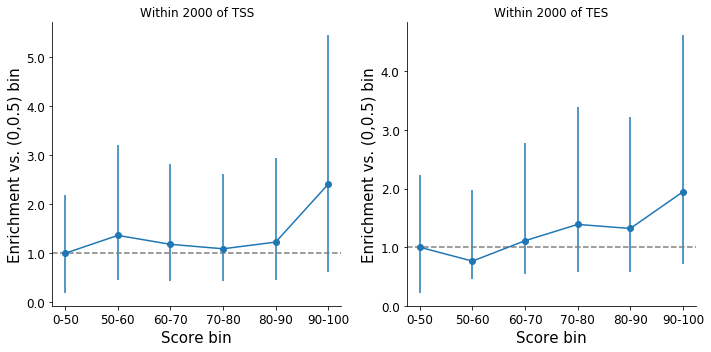

In [19]:
fig = plt.figure()
fig.set_size_inches((10, 5))

# TSS
ax = fig.add_subplot(121)
ax.errorbar(range(len(binlabels)), tss, marker="o", yerr = [tss_low, tss_high])
ax.set_xlabel("Score bin", size=15)
ax.set_ylabel("Enrichment vs. (0,0.5) bin", size=15)
ax.set_xticks(range(len(binlabels)))
ax.set_xticklabels(binlabels, size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.axhline(y = 1.0, linestyle="dashed", color="gray")
ax.set_title("Within %s of TSS"%MINDIST)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# TES
ax = fig.add_subplot(122)
ax.errorbar(range(len(binlabels)), tes, marker="o", yerr = [tes_low, tes_high])
ax.set_xlabel("Score bin", size=15)
ax.set_ylabel("Enrichment vs. (0,0.5) bin", size=15)
ax.set_xticks(range(len(binlabels)))
ax.set_xticklabels(binlabels, size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.axhline(y = 1.0, linestyle="dashed", color="gray")
ax.set_title("Within %s of TES"%MINDIST)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()

In [20]:
data["abs.dist.tss"] = abs(data["dist.to.tss"])
data.sort("abs.dist.tss")

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,gene,chrom,best.str.start,best.score,best.tissue,best.q,dist.to.tss,dist.to.tes,abs.dist.tss
4248,ENSG00000160213.5,chr21,45196326.0,0.941574,Cells-Transformedfibroblasts,0.005126,-0.0,-3933.0,0.0
15475,ENSG00000175166.12,chr3,184016497.0,0.045478,Lung,0.393445,0.0,-10345.0,0.0
941,ENSG00000140323.4,chr15,40650434.0,0.691871,Cells-Transformedfibroblasts,0.005126,-2.0,-12823.0,2.0
530,ENSG00000166664.9,chr15,30686060.0,0.015152,Esophagus-Mucosa,0.124575,-8.0,-32617.0,8.0
3576,ENSG00000198853.7,chr9,35490114.0,0.102856,WholeBlood,0.187870,-10.0,-71781.0,10.0
11492,ENSG00000185963.9,chr9,95527084.0,0.008051,Lung,1.000000,10.0,-53439.0,10.0
2872,ENSG00000142794.14,chr1,21766606.0,0.018670,Esophagus-Mucosa,0.010185,-15.0,-44892.0,15.0
11252,ENSG00000157601.9,chr21,42792209.0,0.012075,Esophagus-Mucosa,0.734184,-22.0,-38932.0,22.0
10408,ENSG00000037965.4,chr12,54402809.0,0.031135,Lung,0.601165,-23.0,-4761.0,23.0
6774,ENSG00000206561.8,chr3,15563227.0,0.051663,Cells-Transformedfibroblasts,0.201654,31.0,-71587.0,31.0
